In [1]:
%load_ext autoreload
%autoreload 2

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import sys
sys.path.append('../')
import gp

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [7]:
#
#
# this needs to be run against commit 959c5e7233044f27932b41c0d311adfeaeb1fc7d
#
#

In [2]:
e_p = []
p = []

In [2]:
import cPickle as pickle
with open('../nets/IPMLB_FULL.p', 'rb') as f:
    cnn = pickle.load(f)
cnn.uuid = 'IPMLB'

In [3]:
# for z in range(0,1):
e_p = []
p = []
image, prob, gold, rhoana, bb = gp.Legacy.read_dojo_data()

for z in range(0,10):

    error_patches, patches = gp.Patch.patchify_maxoverlap(image[z], prob[z], np.zeros((image[0].shape[0], image[0].shape[1])), rhoana[z], gold[z], sample_rate=1, clamp_result=False)
    
    e_p.append(error_patches)
    p.append(patches)

a


In [11]:
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_fscore_support
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, zero_one_loss


In [ ]:
#
# guided proofreading
#

In [4]:
gp_y_test_proba = []
gp_y_test = []
gt_y_test = []
for z in range(10):
    
    cur_e_p = e_p[z]
    cur_p = p[z]
    
    for pa in cur_e_p:
#         print pa['l'], pa['n']
        
        label1 = pa['l']
        label2 = pa['n']

        pred = gp.Patch.test_and_unify([pa], cnn)
        
        gp_y_test.append(np.round(pred))
        gp_y_test_proba.append(pred)
        gt_y_test.append(1)
        
    for pa in cur_p:
#         print pa['l'], pa['n']
        
        label1 = pa['l']
        label2 = pa['n']

        pred = gp.Patch.test_and_unify([pa], cnn)        
        
        gp_y_test.append(np.round(pred))
        gp_y_test_proba.append(pred)
        gt_y_test.append(0)

In [28]:
print 'Gold', gt_y_test[0:20]
print 'GP', gp_y_test[0:20]
print 'GP prob', gp_y_test_proba[0:20]

Gold [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
GP [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
GP prob [0.99998939037322998, 0.99998939037322998, 0.88544589281082153, 0.88544589281082153, 0.99904423952102661, 0.99904423952102661, 0.99998939037322998, 0.99998939037322998, 0.85833513736724854, 0.85833513736724854, 0.91311854124069214, 0.91311854124069214, 0.90064680576324463, 0.90064680576324463, 0.98917317390441895, 0.98917317390441895, 0.73506379127502441, 0.73506379127502441, 0.93973934650421143, 0.93973934650421143]


In [9]:
print classification_report(np.array(gt_y_test), np.array(gp_y_test))

             precision    recall  f1-score   support

          0       1.00      0.92      0.96      3488
          1       0.54      0.95      0.69       332

avg / total       0.96      0.92      0.93      3820



In [29]:
precision_recall_fscore_support(np.array(gt_y_test), np.array(gp_y_test))

(array([ 0.9950495 ,  0.53741497]),
 array([ 0.92201835,  0.95180723]),
 array([ 0.95714286,  0.68695652]),
 array([3488,  332]))

In [14]:
# use binary and only report for label==1
precision_recall_fscore_support(np.array(gt_y_test), np.array(gp_y_test), average='binary')

(0.5374149659863946, 0.95180722891566261, 0.68695652173913047, None)

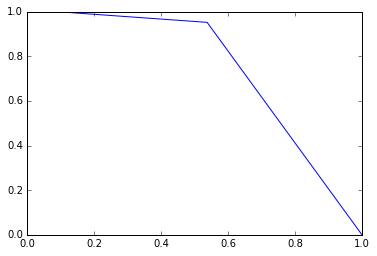

In [18]:
precision, recall, thresholds = precision_recall_curve(gt_y_test, gp_y_test)
plt.plot(precision, recall)

In [ ]:
precision, recall, thresholds = precision_recall_curve(gt_y_test, gp_y_test_proba)
plt.plot(recall, precision)

In [32]:
#
# store gp_y_test_proba
#
with open('/home/d/GPSTUDY/gp_y_test_proba_dojo.p', 'wb') as f:
    pickle.dump(gp_y_test_proba, f)

In [2]:
# cconvert to FP format with target
import neuroproof
import neuroproof.FocusedProofreading as fp

In [3]:

e_p = []
p = []
image, prob, gold, rhoana, bb = gp.Legacy.read_dojo_data()

for z in range(0,10):

    error_patches, patches = gp.Patch.patchify_maxoverlap(image[z], prob[z], np.zeros((image[0].shape[0], image[0].shape[1])), rhoana[z], gold[z], sample_rate=1, clamp_result=False)
    
    e_p.append(error_patches)
    p.append(patches)

a


In [4]:
graphs = []
for z in range(10):
    
    g = fp.Graph('/home/d/FP/dojoNEW/graph_'+str(z)+'.json')
    graphs.append(g)

In [5]:
fp_y_test_proba = []
fp_y_test = []
gt_y_test = []
for z in range(10):
    
    cur_e_p = e_p[z]
    cur_p = p[z]
    
    g = graphs[z]
    
    for pa in cur_e_p:
#         print pa['l'], pa['n']
        
        label1 = pa['l']
        label2 = pa['n']

        graph_neighbors = sorted(g.find_close_bodies(label1,0,0.))

        pred = [ne[1] for ne in graph_neighbors if ne[0] == label2]
        
        fp_y_test.append(np.round(pred))
        fp_y_test_proba.append(pred)
        gt_y_test.append(1)
        
    for pa in cur_p:
#         print pa['l'], pa['n']
        
        label1 = pa['l']
        label2 = pa['n']

        graph_neighbors = sorted(g.find_close_bodies(label1,0,0.))

        pred = [ne[1] for ne in graph_neighbors if ne[0] == label2]
        
        fp_y_test.append(np.round(pred))
        fp_y_test_proba.append(pred)
        gt_y_test.append(0)
    

In [6]:
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_fscore_support
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, zero_one_loss


In [7]:
print 'Gold', gt_y_test[0:20]
print 'FP', fp_y_test[0:20]
print 'FP prob', fp_y_test_proba[0:20]

Gold [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
FP [array([ 1.]), array([ 1.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 1.]), array([ 1.]), array([ 0.]), array([ 0.]), array([ 1.]), array([ 1.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 0.]), array([ 1.]), array([ 1.]), array([ 0.]), array([ 0.])]
FP prob [[0.7137254774570465], [0.7137254774570465], [0.30980390310287476], [0.30980390310287476], [0.45490193367004395], [0.45490193367004395], [0.7137254774570465], [0.7137254774570465], [0.40525950547733114], [0.40525950547733114], [0.7176470458507538], [0.7176470458507538], [0.4470587968826294], [0.4470587968826294], [0.498039186000824], [0.498039186000824], [0.6941176354885101], [0.6941176354885101], [0.427450954914093], [0.427450954914093]]


In [8]:
print 'Precision/Recall:'
print classification_report(np.array(gt_y_test), np.array(fp_y_test))

Precision/Recall:
             precision    recall  f1-score   support

          0       0.94      0.69      0.80      3488
          1       0.14      0.51      0.21       332

avg / total       0.87      0.68      0.75      3820



In [9]:
precision_recall_fscore_support(np.array(gt_y_test), np.array(fp_y_test))

(array([ 0.93653251,  0.13592233]),
 array([ 0.69380734,  0.5060241 ]),
 array([ 0.79710145,  0.21428571]),
 array([3488,  332]))

In [10]:
# use binary and only report for label==1
precision_recall_fscore_support(np.array(gt_y_test), np.array(fp_y_test), average='binary')

(0.13592233009708737, 0.50602409638554213, 0.21428571428571425, None)

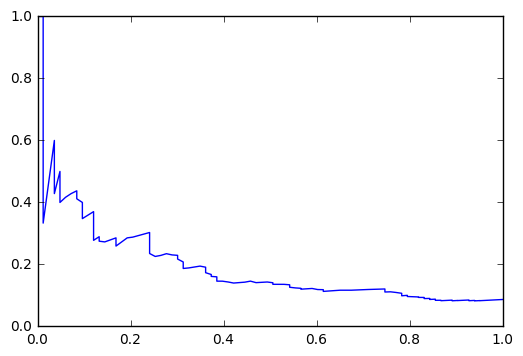

In [11]:
precision, recall, thresholds = precision_recall_curve(gt_y_test, fp_y_test_proba, pos_label=1)
plt.plot(recall, precision)

In [12]:
print gt_y_test[0:100]
print fp_y_test_proba[0:100]
print precision
print recall
print thresholds

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[0.7137254774570465], [0.7137254774570465], [0.30980390310287476], [0.30980390310287476], [0.45490193367004395], [0.45490193367004395], [0.7137254774570465], [0.7137254774570465], [0.40525950547733114], [0.40525950547733114], [0.7176470458507538], [0.7176470458507538], [0.4470587968826294], [0.4470587968826294], [0.498039186000824], [0.498039186000824], [0.6941176354885101], [0.6941176354885101], [0.427450954914093], [0.427450954914093], [0.427450954914093], [0.427450954914093], [0.4470587968826294], [0.4470587968826294], [0.498039186000824], [0.498039186000824], [0.56470587849617], [0.56470587849617], [0.7176470458507538], [0.7176470458507538], [0.45490193367004395], [0.45490193367004395]

In [14]:
#
# store fp_y_test_proba
#
import cPickle as pickle
with open('/home/d/GPSTUDY/fp_y_test_proba_dojo.p', 'wb') as f:
    pickle.dump(fp_y_test_proba, f)

In [5]:
with open('/home/d/GPSTUDY/gt_y_test_dojo.p', 'wb') as f:
    pickle.dump(gt_y_test, f)

In [ ]:
#
# combined plots
#

In [18]:
# load fp and gp
with open('/home/d/GPSTUDY/gp_y_test_proba_dojo.p', 'rb') as f:
    gp_y_test_proba = pickle.load(f)
with open('/home/d/GPSTUDY/fp_y_test_proba_dojo.p', 'rb') as f:
    fp_y_test_proba = pickle.load(f)

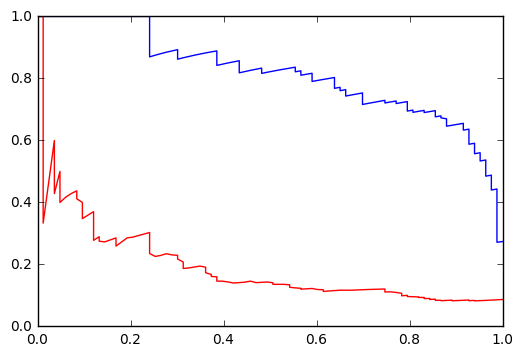

In [20]:
gp_precision, gp_recall, gp_thresholds = precision_recall_curve(gt_y_test, gp_y_test_proba, pos_label=1)
fp_precision, fp_recall, fp_thresholds = precision_recall_curve(gt_y_test, fp_y_test_proba, pos_label=1)
plt.plot(gp_recall, gp_precision, color='blue')
plt.plot(fp_recall, fp_precision, color='red')